# **Polynomial Linear Regression in R**

Polynomial Regression is also known as Polynomial Linear Regression since it depends on the linearly arranged coefficients rather than the variables.

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Position_Salaries.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,Position,Level,Salary
,<chr>,<int>,<int>
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000


## **Splitting the dataset into the Train set and Test set**

In [2]:
ds = ds[2:3]

In [4]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Salary, SplitRatio = 9/10)
split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [5]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,3))

  Level Salary
1     1  45000
2     2  50000
3     3  60000


In [6]:
print(head(test_set,3))

  Level Salary
5     5 110000


## **Fitting Linear Regression to the dataset**

In [7]:
lin_reg = lm(formula = Salary ~ Level, data = train_set)

## **Fitting Polynomial Regression to the dataset**

In [8]:
train_set$Level2 = train_set$Level^2
train_set$Level3 = train_set$Level^3
train_set$Level4 = train_set$Level^4
poly_reg = lm(formula = Salary ~ ., ,data = train_set)

## **Predicting the Test set result**

### **Prediction with Linear regression**

In [9]:
y_pred = predict(lin_reg, newdata = test_set)
print(head(y_pred))

       5 
220439.2 


In [10]:
# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5)) # create a new dataFrame containing a new value in Level = 6.5, 
# ie., create a new dataset containing only one line, only one column.

1 
340753.4

### **Prediction with Polynomial Regression**

In [11]:
test_set$Level2 = test_set$Level^2
test_set$Level3 = test_set$Level^3
test_set$Level4 = test_set$Level^4
test_set

,Level,Salary,Level2,Level3,Level4
,<int>,<int>,<dbl>,<dbl>,<dbl>
5,5,110000,25,125,625


In [12]:
y_pred = predict(poly_reg, newdata = test_set)
print(head(y_pred))

       5 
128158.8 


In [13]:
# Predicting a new result with Polynomial Regression
y_pred =  predict(poly_reg, data.frame(Level = 6.5, Level2 = 6.5^2, Level3 = 6.5^3, Level4 = 6.5^4))
y_pred

1 
163354.9

## **Visualizing the Linear Regression results**

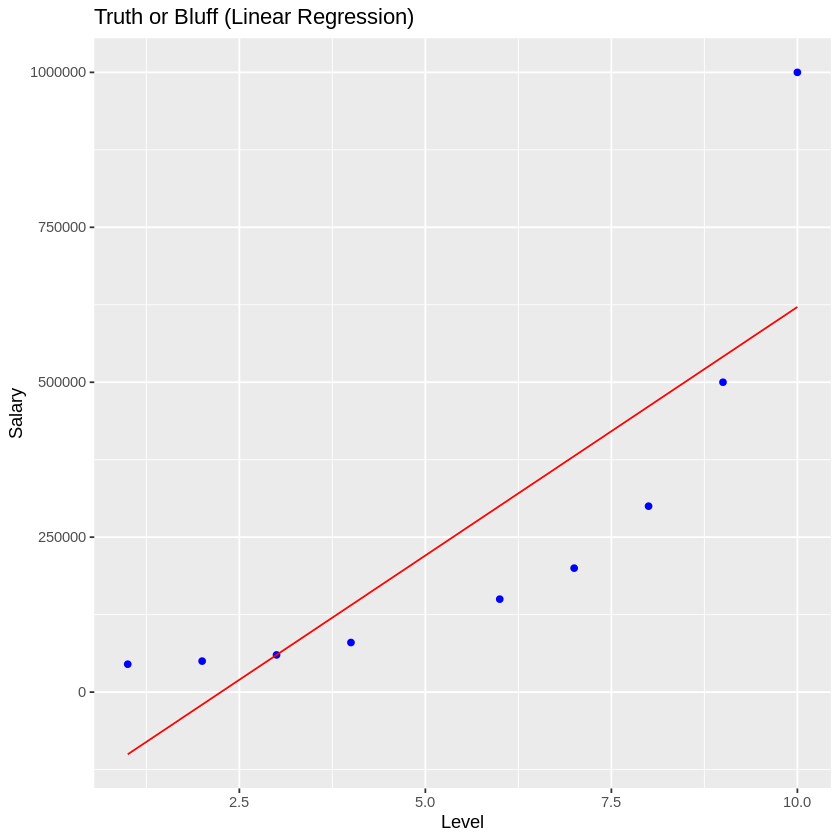

In [14]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'blue') +
  geom_line(aes(x = train_set$Level, y = predict(lin_reg, newdata = train_set)),
            colour = 'red') +
  ggtitle('Truth or Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

## **Visualizing the Polynomial Linear Regression results**

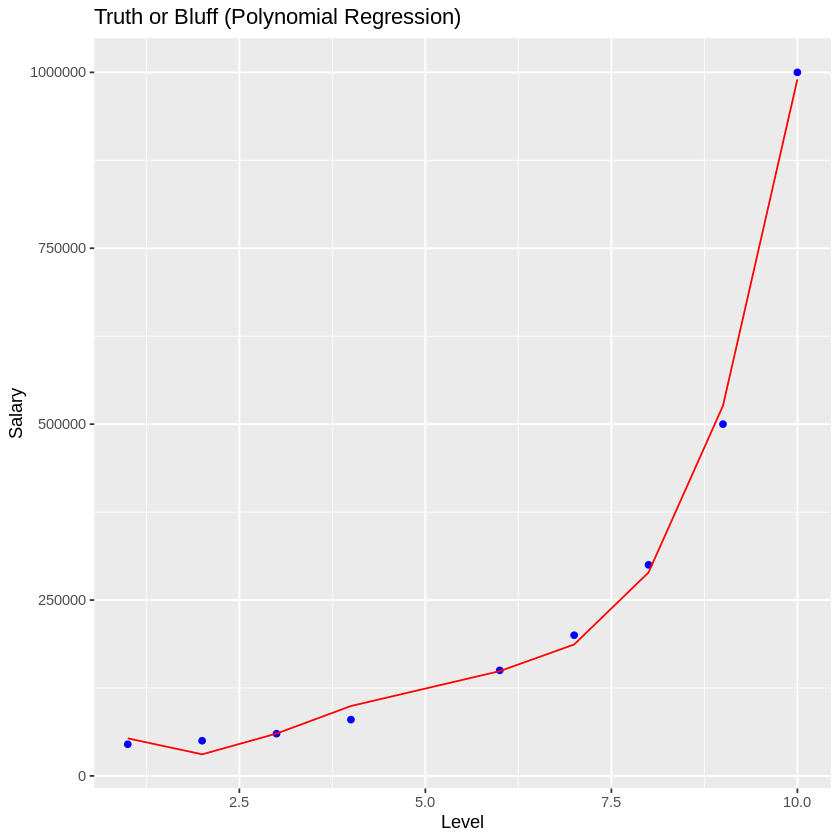

In [15]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'blue') +
  geom_line(aes(x = train_set$Level, y = predict(poly_reg, newdata = train_set)),
            colour = 'red') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

### **Visualizing the Regression Model results (for higher resolution and smoother curve)**

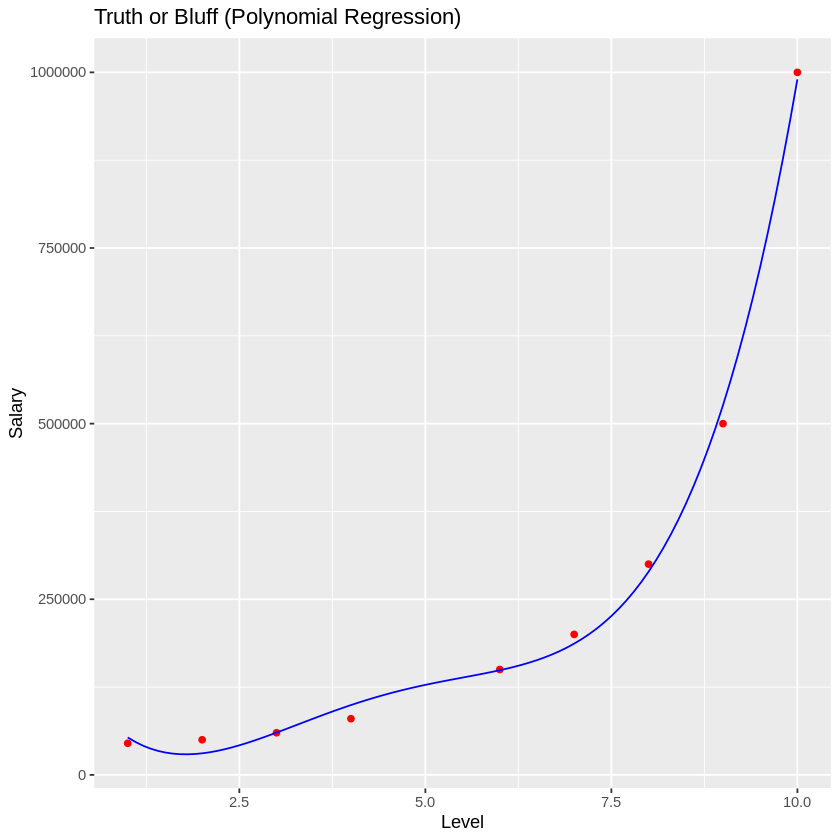

In [16]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(train_set$Level), max(train_set$Level), 0.1)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')